In [129]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [130]:
df = pd.read_csv("Foodpanda Analysis Dataset.csv")
df.tail(10)

,customer_id,gender,age,city,signup_date,order_id,order_date,restaurant_name,dish_name,category,quantity,price,payment_method,order_frequency,last_order_date,loyalty_points,churned,rating,rating_date,delivery_status
5990,C3236,Female,Senior,Peshawar,7/18/2025,O7236,8/21/2025,Pizza Hut,Pasta,Continental,5,1168.73,Card,49,11/12/2024,141,Inactive,1,10/12/2024,Delayed
5991,C5793,Other,Senior,Multan,10/1/2023,O9793,8/21/2025,Subway,Pizza,Italian,2,1375.28,Cash,42,5/21/2025,237,Active,1,2/14/2025,Delivered
5992,C2476,Male,Teenager,Peshawar,2/23/2025,O6476,8/22/2025,Pizza Hut,Pizza,Fast Food,3,1378.12,Card,15,9/10/2024,273,Inactive,1,2/15/2025,Delayed
5993,C5777,Female,Senior,Peshawar,2/11/2024,O9777,8/22/2025,Pizza Hut,Pasta,Fast Food,1,1103.73,Wallet,43,8/21/2025,211,Inactive,1,9/4/2024,Delivered
5994,C5590,Female,Adult,Multan,8/11/2024,O9590,8/22/2025,McDonald's,Burger,Chinese,4,598.01,Card,1,11/28/2024,457,Inactive,2,12/6/2024,Cancelled
5995,C6849,Male,Adult,Multan,11/25/2024,O10849,8/22/2025,Pizza Hut,Burger,Italian,4,875.71,Cash,28,11/29/2024,166,Active,5,12/30/2024,Cancelled
5996,C3787,Female,Adult,Islamabad,1/28/2025,O7787,8/22/2025,KFC,Pizza,Italian,5,1118.26,Cash,12,6/8/2025,193,Inactive,3,2/9/2025,Delayed
5997,C2841,Other,Teenager,Islamabad,10/19/2023,O6841,8/22/2025,KFC,Sandwich,Italian,4,1005.83,Card,31,12/30/2024,278,Active,4,3/23/2025,Cancelled
5998,C1624,Male,Adult,Islamabad,6/17/2024,O5624,8/22/2025,KFC,Fries,Fast Food,4,1226.10,Card,37,12/27/2024,55,Inactive,2,3/15/2025,Delivered
5999,C2068,Female,Adult,Multan,3/15/2025,O6068,8/22/2025,Burger King,Fries,Fast Food,3,1131.27,Card,2,6/13/2025,41,Inactive,1,7/15/2025,Delayed


In [158]:
df.size

132000

In [131]:
df.duplicated().sum()
df.isna().sum()

customer_id        0
gender             0
age                0
city               0
signup_date        0
order_id           0
order_date         0
restaurant_name    0
dish_name          0
category           0
quantity           0
price              0
payment_method     0
order_frequency    0
last_order_date    0
loyalty_points     0
churned            0
rating             0
rating_date        0
delivery_status    0
dtype: int64

In [132]:
for col in df.columns:
    temp = df[col].nunique()
    print(temp)
    

# df["dish_name"].unique()

6000
3
3
5
730
6000
730
5
5
5
5
5872
3
50
366
501
2
5
366
3


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      6000 non-null   object 
 1   gender           6000 non-null   object 
 2   age              6000 non-null   object 
 3   city             6000 non-null   object 
 4   signup_date      6000 non-null   object 
 5   order_id         6000 non-null   object 
 6   order_date       6000 non-null   object 
 7   restaurant_name  6000 non-null   object 
 8   dish_name        6000 non-null   object 
 9   category         6000 non-null   object 
 10  quantity         6000 non-null   int64  
 11  price            6000 non-null   float64
 12  payment_method   6000 non-null   object 
 13  order_frequency  6000 non-null   int64  
 14  last_order_date  6000 non-null   object 
 15  loyalty_points   6000 non-null   int64  
 16  churned          6000 non-null   object 
 17  rating        

In [134]:
df["signup_date"] = pd.to_datetime(df["signup_date"],errors="coerce")
df["last_order_date"] = pd.to_datetime(df["last_order_date"],errors="coerce")
df["order_date"] = pd.to_datetime(df["order_date"],errors="coerce")
df["rating_date"] = pd.to_datetime(df["rating_date"],errors="coerce")


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   customer_id      6000 non-null   object        
 1   gender           6000 non-null   object        
 2   age              6000 non-null   object        
 3   city             6000 non-null   object        
 4   signup_date      6000 non-null   datetime64[ns]
 5   order_id         6000 non-null   object        
 6   order_date       6000 non-null   datetime64[ns]
 7   restaurant_name  6000 non-null   object        
 8   dish_name        6000 non-null   object        
 9   category         6000 non-null   object        
 10  quantity         6000 non-null   int64         
 11  price            6000 non-null   float64       
 12  payment_method   6000 non-null   object        
 13  order_frequency  6000 non-null   int64         
 14  last_order_date  6000 non-null   datetim

In [136]:
avg_loyalty = np.average(df["loyalty_points"])
print("The Average Loyalty Point is :",int(avg_loyalty))

avg_rating = np.average(df["rating"])
print("The Average Rating is :",int(avg_rating))

The Average Loyalty Point is : 250
The Average Rating is : 2


In [137]:
#Are the registered user still active or inactive
df["churned"].value_counts()

churned
Active      3016
Inactive    2984
Name: count, dtype: int64

In [138]:
#Which Payment Method is Mostly Prefered
payment_meth = df["payment_method"].value_counts()
payment_meth


payment_method
Cash      2039
Card      2002
Wallet    1959
Name: count, dtype: int64

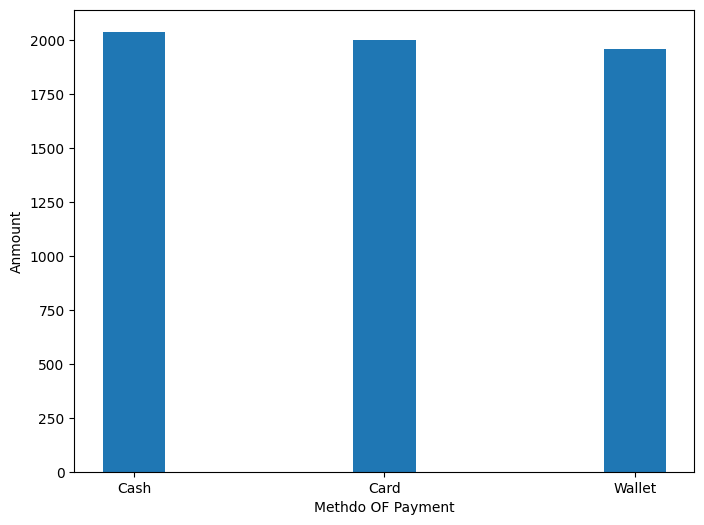

In [139]:
#ploting Payment MEthod

plt.figure(figsize=(8,6))
plt.bar(payment_meth.index,payment_meth.values,width=0.25)
plt.xlabel("Methdo OF Payment")
plt.ylabel("Anmount")
plt.show()

In [140]:
#Which Food category is Mostly Ordered
Most_times_ordered_food = df["category"].value_counts()
Most_times_ordered_food



category
Italian        1236
Fast Food      1222
Continental    1211
Chinese        1198
Dessert        1133
Name: count, dtype: int64

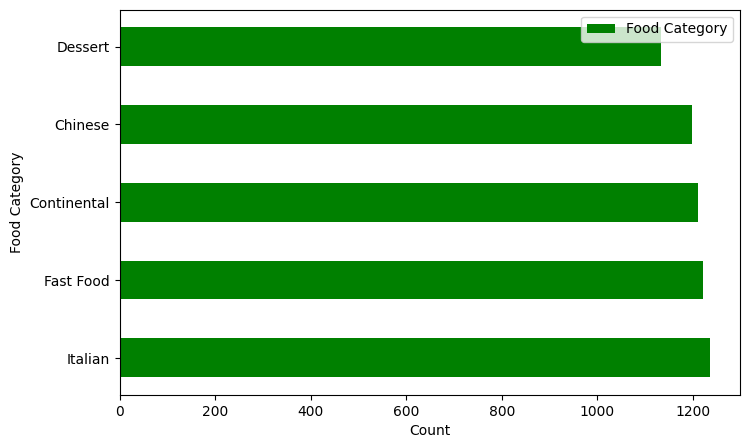

In [141]:
#PLoting Food Category

plt.figure(figsize=(8,5))
plt.barh(Most_times_ordered_food.index,Most_times_ordered_food.values,height=0.50,label="Food Category",color="green")
plt.xlabel("Count")
plt.ylabel("Food Category")
plt.legend()
plt.show()

In [142]:
#Are all value were deleivered or delayed or Cancelled
df["delivery_status"].value_counts()

delivery_status
Delivered    2060
Delayed      1972
Cancelled    1968
Name: count, dtype: int64

In [143]:
#Which Gender Prefer Order The online Food Mostly
df["gender"].value_counts()

gender
Female    2018
Male      2017
Other     1965
Name: count, dtype: int64

In [144]:
#Who orders The Food Most
df["age"].value_counts()

age
Teenager    2062
Adult       1984
Senior      1954
Name: count, dtype: int64

In [145]:
#How much transaction Happened offline  or card ,wallet
df.groupby("payment_method")["price"].sum()

payment_method
Card      1592170.24
Cash      1647244.49
Wallet    1563734.55
Name: price, dtype: float64

In [146]:
#Which Category Food has  been sold out most by quantity
df.groupby("category")["quantity"].sum()


category
Chinese        3567
Continental    3644
Dessert        3411
Fast Food      3616
Italian        3712
Name: quantity, dtype: int64

In [147]:
df["Order_Before_Signup"] = df["signup_date"]>df["order_date"]
df["Order_Before_Signup"].value_counts()

Order_Before_Signup
True     3028
False    2972
Name: count, dtype: int64

In [148]:
df[df["Order_Before_Signup"]==True]

,customer_id,gender,age,city,signup_date,order_id,order_date,restaurant_name,dish_name,category,...,price,payment_method,order_frequency,last_order_date,loyalty_points,churned,rating,rating_date,delivery_status,Order_Before_Signup
0,C5663,Male,Adult,Peshawar,2024-01-14,O9663,2023-08-23,McDonald's,Burger,Italian,...,1478.27,Cash,38,2025-07-19,238,Active,3,2024-10-14,Cancelled,True
1,C2831,Male,Adult,Multan,2024-07-07,O6831,2023-08-23,KFC,Burger,Italian,...,956.04,Wallet,24,2024-11-25,81,Active,2,2025-08-21,Delayed,True
2,C2851,Other,Senior,Multan,2025-06-20,O6851,2023-08-23,Pizza Hut,Fries,Italian,...,882.51,Cash,42,2025-05-10,82,Inactive,3,2024-09-19,Delayed,True
3,C1694,Female,Senior,Peshawar,2023-09-05,O5694,2023-08-23,Subway,Pizza,Dessert,...,231.30,Card,27,2025-07-24,45,Inactive,2,2025-06-29,Delayed,True
4,C4339,Other,Senior,Lahore,2023-12-29,O8339,2023-08-24,KFC,Sandwich,Dessert,...,1156.69,Cash,35,2024-12-21,418,Inactive,3,2025-03-06,Cancelled,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5779,C5408,Female,Adult,Multan,2025-08-21,O9408,2025-07-28,McDonald's,Pasta,Chinese,...,1435.72,Wallet,42,2025-02-02,239,Inactive,5,2025-08-03,Delivered,True
5790,C4302,Other,Adult,Karachi,2025-08-08,O8302,2025-07-28,Pizza Hut,Fries,Italian,...,1156.25,Cash,15,2024-08-23,359,Inactive,5,2025-04-13,Cancelled,True
5820,C4527,Other,Senior,Karachi,2025-08-18,O8527,2025-08-02,KFC,Sandwich,Chinese,...,1309.79,Cash,24,2025-06-14,207,Inactive,3,2025-06-11,Delayed,True
5826,C2005,Female,Adult,Multan,2025-08-09,O6005,2025-08-02,McDonald's,Fries,Continental,...,728.37,Cash,15,2025-06-03,274,Inactive,4,2024-11-01,Cancelled,True


In [149]:
#What age group of peoples Order The food Most
age_group = df["age"].value_counts()
age_group

age
Teenager    2062
Adult       1984
Senior      1954
Name: count, dtype: int64

In [150]:

def change_age(num):

    if num== "Adult":
        return np.random.randint(18,50)
    elif  num == "Teenager":
        return np.random.randint(7,17)
    elif num == "Senior":
        return np.random.randint(51,70)
    

df["age"]  = df["age"].str.strip().str.title().apply(change_age)
df



,customer_id,gender,age,city,signup_date,order_id,order_date,restaurant_name,dish_name,category,...,price,payment_method,order_frequency,last_order_date,loyalty_points,churned,rating,rating_date,delivery_status,Order_Before_Signup
0,C5663,Male,44,Peshawar,2024-01-14,O9663,2023-08-23,McDonald's,Burger,Italian,...,1478.27,Cash,38,2025-07-19,238,Active,3,2024-10-14,Cancelled,True
1,C2831,Male,39,Multan,2024-07-07,O6831,2023-08-23,KFC,Burger,Italian,...,956.04,Wallet,24,2024-11-25,81,Active,2,2025-08-21,Delayed,True
2,C2851,Other,64,Multan,2025-06-20,O6851,2023-08-23,Pizza Hut,Fries,Italian,...,882.51,Cash,42,2025-05-10,82,Inactive,3,2024-09-19,Delayed,True
3,C1694,Female,64,Peshawar,2023-09-05,O5694,2023-08-23,Subway,Pizza,Dessert,...,231.30,Card,27,2025-07-24,45,Inactive,2,2025-06-29,Delayed,True
4,C4339,Other,58,Lahore,2023-12-29,O8339,2023-08-24,KFC,Sandwich,Dessert,...,1156.69,Cash,35,2024-12-21,418,Inactive,3,2025-03-06,Cancelled,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,C6849,Male,23,Multan,2024-11-25,O10849,2025-08-22,Pizza Hut,Burger,Italian,...,875.71,Cash,28,2024-11-29,166,Active,5,2024-12-30,Cancelled,False
5996,C3787,Female,48,Islamabad,2025-01-28,O7787,2025-08-22,KFC,Pizza,Italian,...,1118.26,Cash,12,2025-06-08,193,Inactive,3,2025-02-09,Delayed,False
5997,C2841,Other,16,Islamabad,2023-10-19,O6841,2025-08-22,KFC,Sandwich,Italian,...,1005.83,Card,31,2024-12-30,278,Active,4,2025-03-23,Cancelled,False
5998,C1624,Male,49,Islamabad,2024-06-17,O5624,2025-08-22,KFC,Fries,Fast Food,...,1226.10,Card,37,2024-12-27,55,Inactive,2,2025-03-15,Delivered,False


In [151]:
df["age"].value_counts()
df["age"].max()
df["age"].min()
df["age"].mean()

np.float64(34.541666666666664)

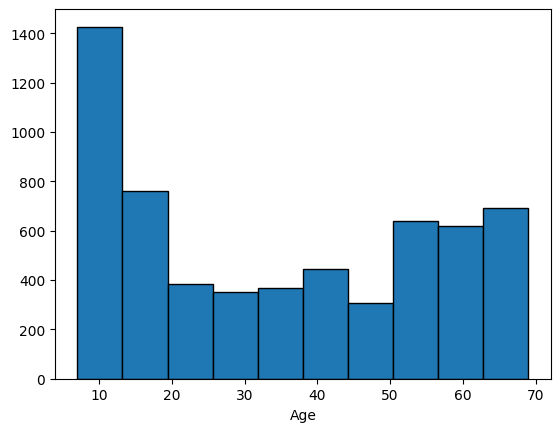

In [152]:
#Lets Plot histogram 
plt.hist(df["age"],bins=10,edgecolor="black")
plt.xlabel("Age")
plt.show()

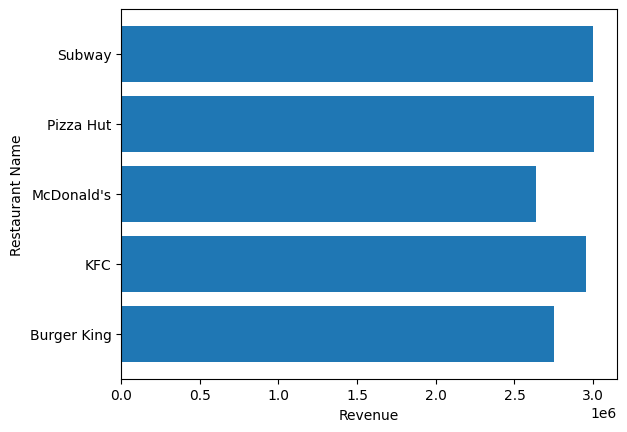

In [153]:
#Total Revenue by Each Resaurant
df["revenue"] = df["price"]*df["quantity"]
resto_revenue = df.groupby("restaurant_name")["revenue"].sum()


plt.barh(resto_revenue.index,resto_revenue.values)
plt.xlabel("Revenue")
plt.ylabel("Restaurant Name")
plt.show()

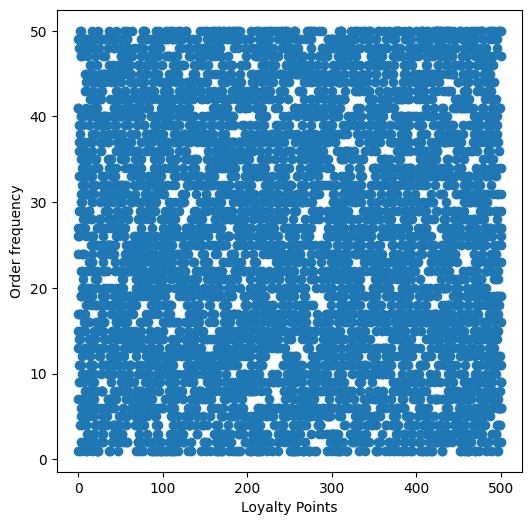

In [155]:
#Correlation Between the Loayalty Point and Frequency

plt.figure(figsize=(6,6))
plt.scatter(df["loyalty_points"],df["order_frequency"])
plt.xlabel("Loyalty Points")
plt.ylabel("Order frequency")
plt.show()

In [157]:
df[["loyalty_points","order_frequency"]].corr()

,loyalty_points,order_frequency
loyalty_points,1.000000,0.006744
order_frequency,0.006744,1.000000
